In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Diabetes.csv')

In [3]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,NaN,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,NaN,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,NaN,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [4]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,0.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,NaN,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,NaN,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,NaN,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,NaN,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,NaN,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,NaN,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Unnamed: 0                  769
Pregnancies                   1
Glucose                       1
blood pressure                1
skin thickness                1
Insulin                       1
BMI                           1
DiabetesPedigreeFunction      1
Age                           1
Outcome                       1
dtype: int64

In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.head()

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [8]:
df.isna().sum()

Pregnancies                 1
Glucose                     1
blood pressure              1
skin thickness              1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64

In [9]:
df = df.interpolate()

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
blood pressure              0
skin thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
import seaborn as sn

<AxesSubplot:>

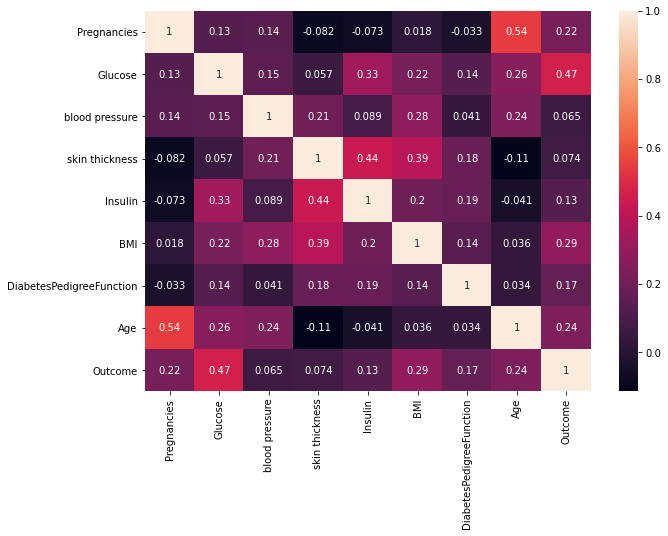

In [13]:
plt.figure(figsize = (10, 7))
sn.heatmap(df.corr(), annot=True)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis = 'columns'), df.Outcome, test_size = 0.2)

In [16]:
x_train.head(3)

,Pregnancies,Glucose,blood pressure,skin thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
211,0.0,147.0,85.0,54.0,0.0,42.8,0.375,24.0
158,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22.0
557,8.0,110.0,76.0,0.0,0.0,27.8,0.237,58.0


In [17]:
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

C:\Users\amit kumar choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.predict(x_test.head(3))

array([0., 0., 0.])

In [20]:
y_test.head(3)

616    0.0
356    1.0
371    0.0
Name: Outcome, dtype: float64

In [21]:
from sklearn.metrics import confusion_matrix
model.score(x_test, y_test)

0.7337662337662337

In [22]:
cm = confusion_matrix(y_test, model.predict(x_test))

<AxesSubplot:>

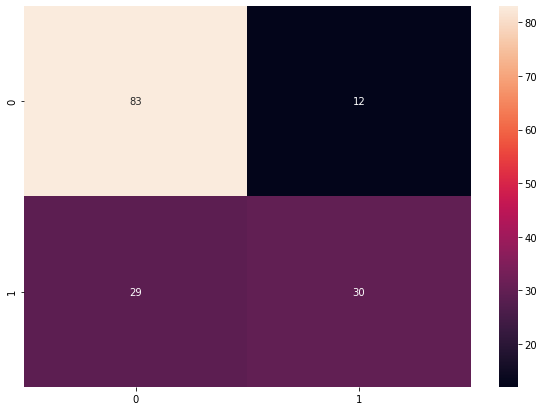

In [23]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25, criterion = 'entropy', random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7532467532467533

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [27]:
accuracy_score(y_pred, y_test)

0.6753246753246753

In [28]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

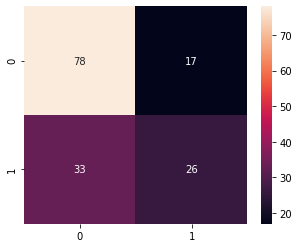

In [29]:
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)